<a href="https://colab.research.google.com/github/SandeepH2706/K-Nearest-Neighbors-KNN-/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K Nearest Neighbors with Python

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Load the Data

In [ ]:
df = pd.read_csv("Classified Data.txt",index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


##Standardizing
Standardizing the variables is important for KNN because the algorithm uses distances to find the closest data points. If some features have larger values, they can dominate the distance calculation and affect the model's performance.


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()


,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


##Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)
print("X Traning Data Set:",X_train)
print("Y Traning Data Set:",y_train)
print("X TestingData Set:", X_test)
print("Y Testing Data Set:", y_test)

X Traning Data Set: [[-0.52413464  0.64493489  0.78928706 ...  0.09617034 -0.67249299
   2.05626617]
 [ 0.27691718 -1.38317402 -1.17208129 ... -1.12590801  0.75754772
  -0.16385485]
 [-0.17233705  0.43420804  1.70468983 ...  0.52600715 -0.15262558
   0.62426501]
 ...
 [-0.78870217  0.33931821  0.30151137 ...  0.28570652 -0.68249379
  -0.37784986]
 [ 0.28528958 -1.58900367 -1.10105664 ... -0.23688139  0.33309205
   0.19567867]
 [ 0.23641954 -0.11032257 -1.35558441 ...  0.0760434   1.35898698
  -1.26426752]]
Y Traning Data Set: 714    0
108    1
17     0
767    1
841    1
      ..
897    0
253    1
2      0
182    1
148    1
Name: TARGET CLASS, Length: 700, dtype: int64
X TestingData Set: [[-0.50088966 -1.4678812  -1.72097564 ...  0.45229187  0.37952636
  -0.83719833]
 [-1.0567081   1.38454152 -0.61040176 ... -0.7544219   0.66419687
  -1.85427747]
 [-0.76129141  0.34133392 -1.28581853 ...  0.57390421  0.19164674
   0.58038248]
 ...
 [-1.37000815 -0.19953289  0.62192895 ...  1.34814796 -2

#K-Nearest Neighbors (KNN) classifier to predict the class of test data points

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=1, n_neighbors=1, p=2,weights='uniform')
pred = knn.predict(X_test)


#Predicting and evavluations


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[139  20]
 [ 12 129]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       159
           1       0.87      0.91      0.89       141

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



#Choosing a K Value

In [ ]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
Best_k=error_rate.index(min(error_rate))
print("Best K Value:",Best_k)

Best K Value: 33


##Ploting Error Graph

Text(0, 0.5, 'Error Rate')

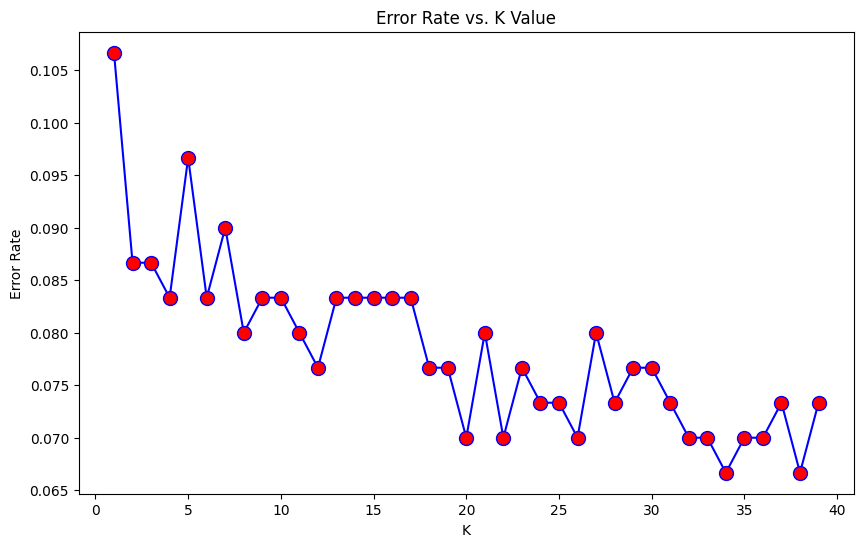

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred1= knn.predict(X_test)
print('WITH K=1')
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

WITH K=1
[[139  20]
 [ 12 129]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       159
           1       0.87      0.91      0.89       141

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



#NOW WITH K=33

In [ ]:
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(X_train,y_train)
pred33= knn.predict(X_test)
print('WITH K=33')
print(confusion_matrix(y_test,pred33))
print(classification_report(y_test,pred33))

WITH K=33
[[144  15]
 [  6 135]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       159
           1       0.90      0.96      0.93       141

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



# Correlation Heatmap

##correlation between different features. Highly correlated features can affect the performance of the KNN classifier.

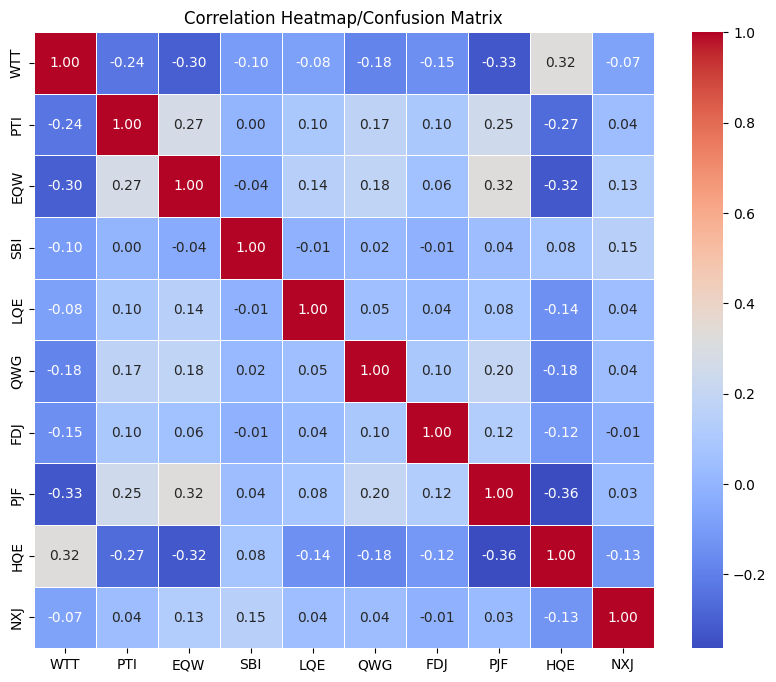

In [ ]:
import seaborn as sns
corr_matrix = df.drop('TARGET CLASS', axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap/Confusion Matrix')
plt.show()

#Receiver Operating Characteristic (ROC) Curve

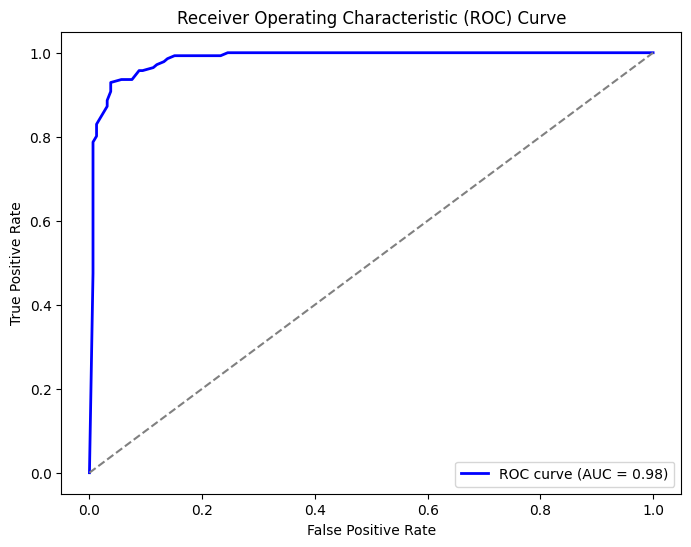

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
# Binarize the labels (if needed for multi-class classification)
y_test_bin = label_binarize(y_test, classes=[0, 1])
y_pred_prob = knn.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
# Get ROC curve data
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_prob)
# Calculate AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

#K-Nearest Neighbours algorithm using euclidean Distance

##Let’s compare our implementation with the one provided by scikit learn. I am going to use a simple toy dataset that contains two predictors, which are age and salary. Thus, we want to predict if a customer is willing to purchase our product.

##Importing the dataset

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


##Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

##Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) #avoid data leakage

##Training the K-NN model on the Training set

In [ ]:

from math import sqrt
class KNN():
  def __init__(self,k):
    self.k=k
    # print(self.k)

  def fit(self,X_train,y_train):
    self.x_train=X_train
    self.y_train=y_train

  def calculate_euclidean(self,sample1,sample2):
    distance=0.0
    for i in range(len(sample1)):
      distance+=(sample1[i]-sample2[i])**2  #Euclidean Distance = sqrt(sum i to N (x1_i – x2_i)^2)
    return sqrt(distance)

  def nearest_neighbors(self,test_sample):
    distances=[]   #calculate distances from a test sample to every sample in a training set
    for i in range(len(self.x_train)):
      distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
    distances.sort(key=lambda x:x[1])    #sort in ascending order, based on a distance value
    neighbors=[]
    for i in range(self.k):   #get first k samples
      neighbors.append(distances[i][0])
    return neighbors

  def predict(self,test_set):
    predictions=[]
    for test_sample in test_set:
      neighbors=self.nearest_neighbors(test_sample)
      labels=[sample for sample in neighbors]
      prediction=max(labels,key=labels.count)
      predictions.append(prediction)
    return predictions

In [ ]:
model=KNN(7) #our model
model.fit(X_train,y_train)
predictions=model.predict(X_test)#our model's predictions

7


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test,predictions)
print(cm)
print(classification_report(y_test,predictions))

[[64  4]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



##Choosing a K Value

In [ ]:
error_rate_own= []
for i in range(1,40):
    model=KNN(i) #our model
    model.fit(X_train,y_train)
    pred_i = model.predict(X_test)
    error_rate_own.append(np.mean(pred_i != y_test))
Best_k=error_rate_own.index(min(error_rate_own))
print("Best K Value:",Best_k)

Best K Value: 2


##Using the default model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)#The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

[[64  4]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



##Visualising the Test set results

<ipython-input-16-4086b5de55b9>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


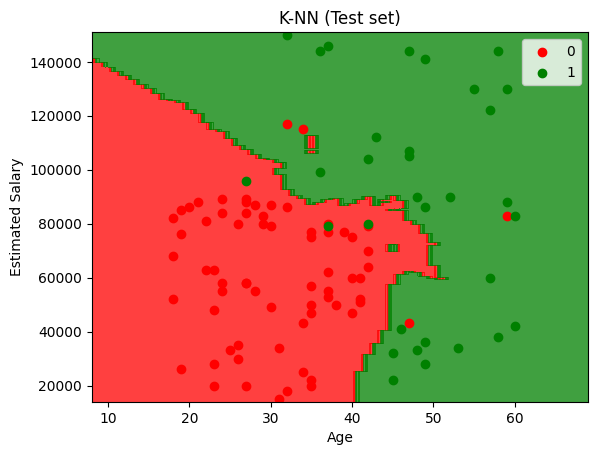

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()